<a href="https://colab.research.google.com/github/ilyaShevchuk/PyData/blob/main/laba_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import plotly.express as px
import numpy as np 
import matplotlib.pyplot as plt
ds = pd.read_csv('vgsales.csv')
print(ds)


        Rank  ... Global_Sales
0          1  ...        82.74
1          2  ...        40.24
2          3  ...        35.82
3          4  ...        33.00
4          5  ...        31.37
...      ...  ...          ...
16593  16596  ...         0.01
16594  16597  ...         0.01
16595  16598  ...         0.01
16596  16599  ...         0.01
16597  16600  ...         0.01

[16598 rows x 11 columns]


# Описание датасета
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [ ]:
print ('types:')
print (ds.dtypes)
print ('size = ', ds.size)
print ('shape = ', ds.shape)

types:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
size =  182578
shape =  (16598, 11)


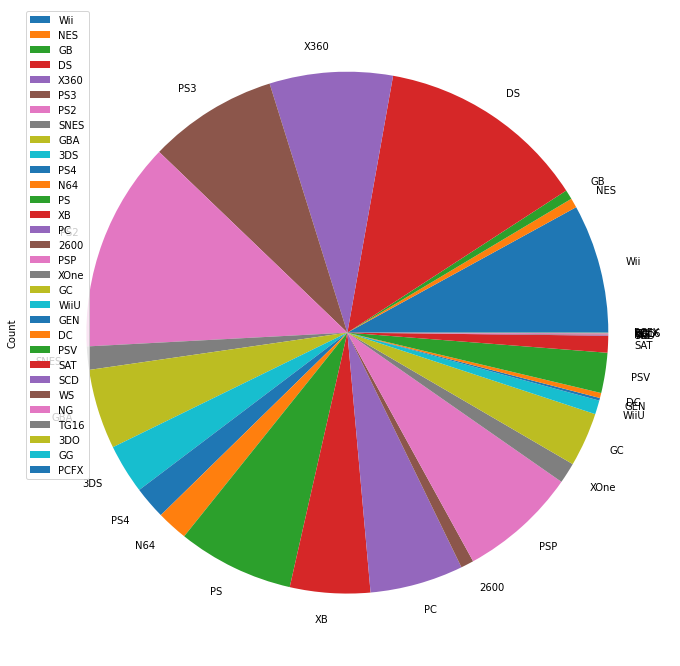

In [ ]:
#1 Разделение проданных игр по разным платформам
plats = ds['Platform'].tolist()
plats_names = list(dict.fromkeys(l))
plats_cnt = []
for i in plats_names:
  plats_cnt.append(plats.count(i))
ds1 = pd.DataFrame ({'Count':br}, index = plats_names)
plot = ds1.plot.pie(y='Count',figsize=(18, 12))

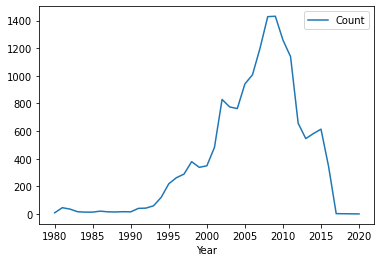

In [ ]:
#2 Зависимость количества вышедших игр от года
list1 = ds['Year'].tolist()
dic = {}
for i in range(len(list1)):
  if not list1[i] in dic:
    dic[list1[i]] = 1
  else:
    dic[list1[i]] += 1
plott = pd.DataFrame(dic.items(), columns=['Year', 'Count'])
plott = plott.sort_values(by=['Year'])
plott.plot.line(x='Year', y='Count')

In [ ]:
#3 Найти самые продаваемые, непродоваемые, средние игры с проджами больше нуля в регионе Северная Америка выпущннных до 2005. 
year_fix = ds.loc[ds['Year'] < 2005 ]
Platform = year_fix['Platform'].tolist()
AS = list(dict.fromkeys(Platform))
for i in AS:
  min = year_fix.query('Platform==@i & NA_Sales > 0')['NA_Sales'].min()
  mid = year_fix.query('Platform==@i & NA_Sales > 0')['NA_Sales'].median()
  max = year_fix.query('Platform==@i & NA_Sales > 0')['NA_Sales'].max()
  print("Platform:", i)
  print("min:", min)
  print("max:", max)
  print("mid:", mid)

Platform: NES
min: 0.01
max: 29.08
mid: 0.53
Platform: GB
min: 0.29
max: 23.2
mid: 0.96
Platform: PS2
min: 0.01
max: 9.43
mid: 0.15
Platform: SNES
min: 0.03
max: 12.78
mid: 0.87
Platform: GBA
min: 0.01
max: 6.06
mid: 0.12
Platform: N64
min: 0.01
max: 6.91
mid: 0.22
Platform: PS
min: 0.01
max: 4.02
mid: 0.13
Platform: DS
min: 0.03
max: 5.08
mid: 0.15500000000000003
Platform: XB
min: 0.01
max: 6.82
mid: 0.11
Platform: 2600
min: 0.07
max: 7.28
mid: 0.45
Platform: GC
min: 0.01
max: 4.41
mid: 0.11
Platform: PC
min: 0.01
max: 4.03
mid: 0.04
Platform: GEN
min: 0.95
max: 4.47
mid: 1.24
Platform: DC
min: 0.41
max: 1.26
mid: 1.06
Platform: PSP
min: 0.03
max: 0.52
mid: 0.155
Platform: SAT
min: 0.17
max: 0.34
mid: 0.21
Platform: SCD
min: 1.0
max: 1.0
mid: 1.0
Platform: WS
min: nan
max: nan
mid: nan
Platform: NG
min: nan
max: nan
mid: nan
Platform: TG16
min: nan
max: nan
mid: nan
Platform: 3DO
min: nan
max: nan
mid: nan
Platform: GG
min: nan
max: nan
mid: nan
Platform: PCFX
min: nan
max: nan
mid: n

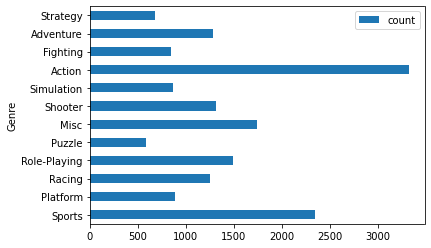

In [ ]:
#4 гистограмма
genre = ds['Genre'].tolist()
gb = list(dict.fromkeys(genre)) 
dif_genre = []
for i in gb:
  dif_genre.append(genre.count(i))
f = pd.DataFrame({'Genre': gb, 'count': dif_genre})
s = f.plot.barh(x='Genre', y='count')

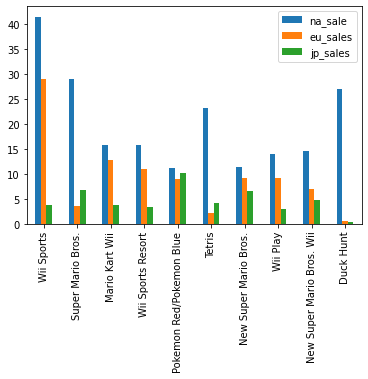

In [ ]:
#Распределние продаж 10 самых популярных игр на разные регионы
top = ds.head(10)
na_sales = []
eu_sales = []
jp_sales = []
names = top['Name'].tolist()
n_names = list(dict.fromkeys(names))
for i in n_names:
   na_sales.append(ds.query('Name == @i')['NA_Sales'].max())
   eu_sales.append(ds.query('Name == @i')['EU_Sales'].max())
   jp_sales.append(ds.query('Name == @i')['JP_Sales'].max())

ds1 = pd.DataFrame ({'na_sale':na_sales, 'eu_sales':eu_sales, 'jp_sales':jp_sales}, index = n_names)
plot = ds1.plot.bar()